In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.special import softmax, expit

from foldcraft.zurtein.residue_constants import atom_types
from foldcraft.alphafold.alphafold import alphafold_setup, alphafold_load_feature, alphafold_predict_structure

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 12


In [2]:
model_name = "model_1"
fasta_name = "test"


model_runner = alphafold_setup(model_name)
feature_dict = alphafold_load_feature(fasta_name)
prediction_result = alphafold_predict_structure(model_runner, model_name, feature_dict, fasta_name)

I0000 00:00:1705245599.885624       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


[Time] Load feature: 0.00 s
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2024-01-14 23:20:01.963739: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


[Time] Process feature: 1.19 s
[Time] Predict and compile: 71.12 s


In [7]:
print(prediction_result.keys())

dict_keys(['distogram', 'experimentally_resolved', 'masked_msa', 'predicted_lddt', 'structure_module', 'plddt', 'ranking_confidence'])


In [49]:
bin_width = np.mean(prediction_result["distogram"]["bin_edges"][1:] - prediction_result["distogram"]["bin_edges"][:-1])
bin_means = prediction_result["distogram"]["bin_edges"] - bin_width/2
bin_means = np.append(bin_means, bin_means[-1] + bin_width)

distogram = np.sum(softmax(prediction_result["distogram"]["logits"], axis=2)*bin_means, axis=2)

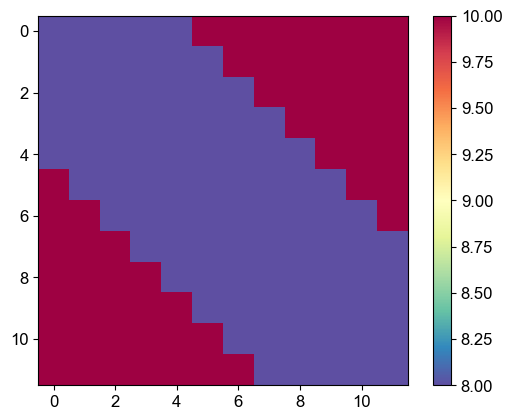

In [54]:
plt.imshow(distogram, cmap="Spectral_r", vmin=8, vmax=10)
plt.colorbar()

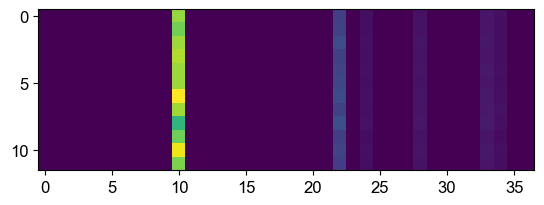

In [60]:
plt.imshow(softmax(prediction_result["experimentally_resolved"]["logits"]))

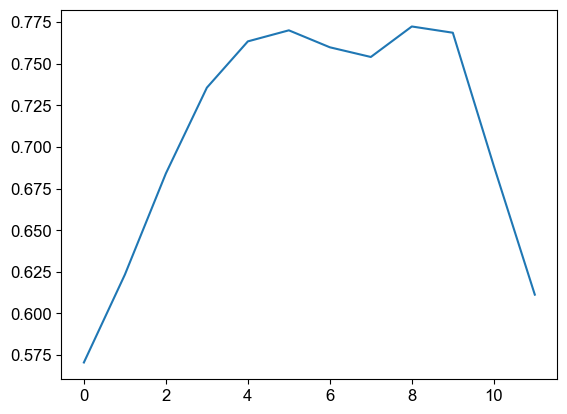

In [79]:
logits = prediction_result["predicted_lddt"]["logits"]
num_bins = logits.shape[-1]
bin_width = 1.0 / num_bins
bin_centers = np.arange(start=0.5 * bin_width, stop=1.0, step=bin_width)
probs = softmax(logits, axis=-1)
predicted_values = np.sum(probs * bin_centers, axis=-1)

plt.plot(predicted_values)

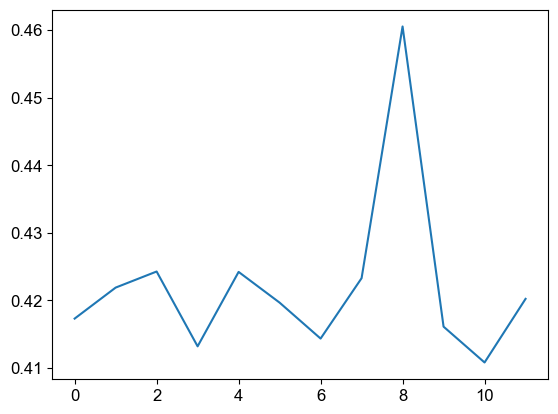

In [80]:
logits = prediction_result["experimentally_resolved"]["logits"]
num_bins = logits.shape[-1]
bin_width = 1.0 / num_bins
bin_centers = np.arange(start=0.5 * bin_width, stop=1.0, step=bin_width)
probs = softmax(logits, axis=-1)
predicted_values = np.sum(probs * bin_centers, axis=-1)

plt.plot(predicted_values)

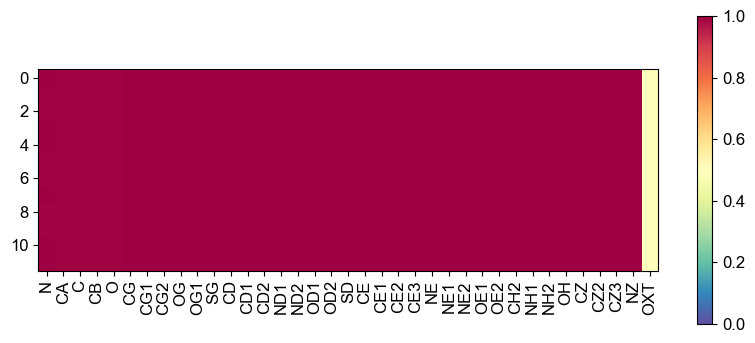

In [97]:
plt.figure(figsize=(10, 4))
plt.imshow(expit(prediction_result["experimentally_resolved"]["logits"]), vmin=0, vmax=1, cmap="Spectral_r")
plt.xticks(np.arange(0, 37, 1), atom_types, rotation=90)
plt.colorbar()

In [94]:
expit(1)

0.7310585786300049